# Taller 3

## Métodos Computacionales 2

Instrucciones: Suba el jupyter notebook **.ipynb** en la actividad de bloque neon. El archivo debe ser nombrado ApellidoNombreApellidoNombre_Taller3.ipynb, con su primer Apellido y Nombre de cada integrante de la pareja. **El archivo debe poder correr en google colab**

Si un ejercicio demora **más de 10 segundos** en correr se considerará **incorrecto**.

La simulación no debe demorar más de **30 segundos** en compilar y correr.

No modifique el cuaderno, ni los modos de lectura de los archivos.

**Entrega: Viernes 22 de Septiembre 11:59 pm**

## Librerias

In [1]:
import time
import numpy as np
import scipy as sci
import scipy.integrate as integrate
import sympy as sym
from sympy import symbols
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation as ani
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import time
plt.style.use('dark_background')

In [2]:
from matplotlib import rc
rc("animation", html = "jshtml")
sym.init_printing()
#matplotlib.rcParams['animation.embed_limit'] = 2**128

## Problema 1

El siguiente codigo de C++ se obtienen los puntos de un tiro parabólico con los siguientes parametros,

$x_0 = 0\text{ m }$,
$y_0 = 10\text{ m }$,
$v_{x0} = 10\text{ m/s }$,
$v_{y0} = 10\text{ m }$,
$t_f = 2.733 \text{ s }$,
$dt = 0.01 \text{ s }$

y tomando gravedad como,

$g = 10 \text{ m/s }^2$

Además el código en python, y el script gráfican en matplotlib estos puntos,

problema: Modificar el código de `C++` para incluir un tiro parabólico con fricción del aire y con las mismas condiciones iniciales usando el método de Runge-Kutta de 4to orden, al final debe gráficar el tiro parabólico normal y el tiro parabólico con fricción en la misma gráfica.

Tome el coeficiente de fricción del aire y la masa como se definen en el archivo de C++.

$b = 0.2 \text{ kg/s }$,
$m = 1 \text{ kg }$.

El método de Runge-Kutta para ecuaciones diferenciales de segundo orden tiene la forma,

 ![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/runge%20kutta%202nd%20order.png)


In [3]:
%%writefile parabolico.cpp

#include <iostream>
#include <vector>
#include <fstream>
#include <cmath>
#define g 10.0
#define m 1
#define b 0.2

using namespace std;

// Función para calcular la derivada de x con respecto al tiempo
double dxdt(double /*t*/, double /*x*/, double vx) {
    return vx;
}

// Función para calcular la derivada de vx con respecto al tiempo
double dvxdt(double /*t*/, double /*x*/, double vx, double vy) {
    double v = sqrt(vx * vx + vy * vy);
    return -b / m * v * vx;
}

// Función para calcular la derivada de y con respecto al tiempo
double dydt(double /*t*/, double /*y*/, double vy) {
    return vy;
}

// Función para calcular la derivada de vy con respecto al tiempo
double dvydt(double /*t*/, double /*y*/, double vy, double vx) {
    double v = sqrt(vx * vx + vy * vy);
    return -g - b / m * v * vy;
}

int main() {
    float x_init = 0;
    float y_init = 10;
    float vx_init = 10;
    float vy_init = 10;

    float dt = 0.01;
    float t_total = 2.733;
    cout << "total_time:" <<  t_total << endl;
    int N = t_total/dt;
    cout << N;

    vector<double> pos_x(N + 1);
    vector<double> pos_y(N + 1);
    
    pos_x[0] = x_init;
    pos_y[0] = y_init;


    for (int i = 0; i < N; i++) {
        double t = i * dt;

        // Método de Runge-Kutta de 4to orden
        double k1vx = dt * dvxdt(t, pos_x[i], vx_init, vy_init);
        double k1vy = dt * dvydt(t, pos_y[i], vy_init, vx_init);
        double k1x = dt * dxdt(t, pos_x[i], vx_init);
        double k1y = dt * dydt(t, pos_y[i], vy_init);

        double k2vx = dt * dvxdt(t + 0.5 * dt, pos_x[i] + 0.5 * k1x, vx_init + 0.5 * k1vx, vy_init + 0.5 * k1vy);
        double k2vy = dt * dvydt(t + 0.5 * dt, pos_y[i] + 0.5 * k1y, vy_init + 0.5 * k1vy, vx_init + 0.5 * k1vx);
        double k2x = dt * dxdt(t + 0.5 * dt, pos_x[i] + 0.5 * k1x, vx_init + 0.5 * k1vx);
        double k2y = dt * dydt(t + 0.5 * dt, pos_y[i] + 0.5 * k1y, vy_init + 0.5 * k1vy);

        double k3vx = dt * dvxdt(t + 0.5 * dt, pos_x[i] + 0.5 * k2x, vx_init + 0.5 * k2vx, vy_init + 0.5 * k2vy);
        double k3vy = dt * dvydt(t + 0.5 * dt, pos_y[i] + 0.5 * k2y, vy_init + 0.5 * k2vy, vx_init + 0.5 * k2vx);
        double k3x = dt * dxdt(t + 0.5 * dt, pos_x[i] + 0.5 * k2x, vx_init + 0.5 * k2vx);
        double k3y = dt * dydt(t + 0.5 * dt, pos_y[i] + 0.5 * k2y, vy_init + 0.5 * k2vy);

        double k4vx = dt * dvxdt(t + dt, pos_x[i] + k3x, vx_init + k3vx, vy_init + k3vy);
        double k4vy = dt * dvydt(t + dt, pos_y[i] + k3y, vy_init + k3vy, vx_init + k3vx);
        double k4x = dt * dxdt(t + dt, pos_x[i] + k3x, vx_init + k3vx);
        double k4y = dt * dydt(t + dt, pos_y[i] + k3y, vy_init + k3vy);

        pos_x[i + 1] = pos_x[i] + (k1x + 2 * k2x + 2 * k3x + k4x) / 6.0;
        pos_y[i + 1] = pos_y[i] + (k1y + 2 * k2y + 2 * k3y + k4y) / 6.0;

        vx_init += (k1vx + 2 * k2vx + 2 * k3vx + k4vx) / 6.0;
        vy_init += (k1vy + 2 * k2vy + 2 * k3vy + k4vy) / 6.0;
    }

    // Guardar datos en un archivo CSV
    ofstream myfile;
    myfile.open("parabolic_with_friction.csv");
    myfile << "x,y\n";
    for (int i = 0; i < N; i++) {
        myfile << pos_x[i] << "," << pos_y[i] << "\n";
    }
    myfile.close();

    return 0;

}

Overwriting parabolico.cpp


In [4]:
%%script bash

g++ -std=c++14 -Wall -Wextra -pedantic -O3 -o parabolico parabolico.cpp
./parabolico

total_time:2.733
273

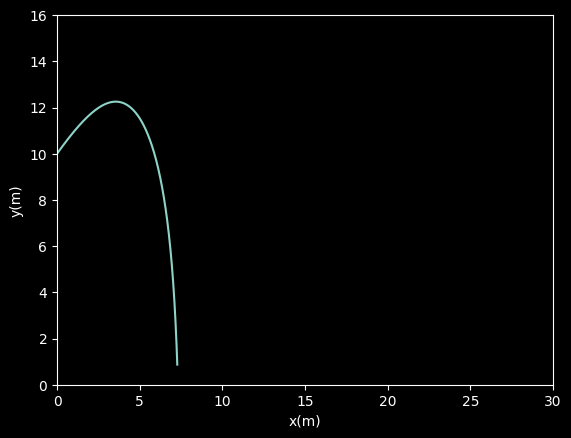

In [5]:
df = pd.read_csv("./parabolic_with_friction.csv")
#df_damped = pd.read_csv("./x_values_damped.csv")
x = np.array(df["x"])
y = np.array(df["y"])
#x_damped = np.array(df_damped["x"])
#y_damped = np.array(df_damped["y"])

plt.ylim([0, 16])
plt.xlim([0, 30])
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.plot(x, y)
#plt.plot(x_damped, y_damped)
plt.show()

In [6]:
%%script bash

rm parabolico parabolic_with_friction.csv

## Problema 2

Considere un sistema compuesto por una esfera hueca de radio $R$ y masa $M$ que gira sin deslizar la cual está conectada en su centro a un resorte con longitud natural (sin estirar) $l$ del cual cuelga una masa $m$ como se muestra en la figura.

![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/pendulo_resorte_cuerpo_rigido.png)

Considere $l_1$, $l_2$, como se muestran en la figura, $f_r$ la fuerza de fricción entre la esfera hueca y la superficie, y $x$, y $y$ como las coordenadas de la masa $m$.

a) Demuestre que las ecuaciones de Newton y de ligadura del sistema son las siguientes,

\begin{align}
m \ddot x &= - k(l_2 - l) \sin{(\theta)} \\
m \ddot y &= - mg + k(l_2 - l) \cos{(\theta)} \\
M \ddot l_1 &= k(l_2 - l) \sin{(\theta)} - f_r \\
f_r &= \frac{2}{3}M \ddot l_1 \\
\ddot x &= \ddot l_1 + \ddot l_2 \sin{(\theta)} + 2 \dot l_2 \cos{(\theta)} \dot \theta - l_2 \sin{(\theta)} (\dot \theta) ^2 + l_2\cos{(\theta)} \ddot \theta\\
\ddot y &= - \ddot l_2 \cos{(\theta)} + 2 \dot l_2 \sin{(\theta)} \dot \theta + l_2 \cos{(\theta)} (\dot \theta) ^2 + l_2\sin{(\theta)} \ddot \theta\\
\end{align}

Sus ecuaciones y demonstración aquí,

Empezamos definiendo 'x' y 'y':

\begin{align}
    x(l_1,l_2,\theta)&=l_1+l_2\sin{\theta}\\
    y(l_2,\theta)&=l_2\cos{\theta}
\end{align}

Ahora hallemos la energía y los potenciales del sistema:

\begin{align}
    T&=\frac{1}{2}m(\dot{x}^2+\dot{y}^2)+\frac{1}{2}M\dot{l_1}^2+\frac{1}{2}I\dot{\omega}^2\\
    U&=\frac{1}{2}k(y-l\cos{\theta})^2+\frac{1}{2}k(x-l_1-l\sin{\theta})^2+mgy
\end{align}

Con esto tenemos el lagrangiano:

\begin{align}
    \mathcal{L}=\frac{1}{2}m(\dot{x}^2+\dot{y}^2)+\frac{1}{2}M\dot{l_1}^2+\frac{1}{2}I\dot{\omega}^2-(\frac{1}{2}k(y-l\cos{\theta})^2+\frac{1}{2}k(x-l_1-l\sin{\theta})^2+mgy)
\end{align}

Ahora debemos tener en cuenta algunas restricciones en el sistema.

\begin{align}
    l_1=\omega R
\end{align}

Basta entonces con usar la ecuación de Euler-Lagrange en las coordenadas pertinentes y así obtener los resultados de arriba.

\begin{align}
    \frac{\partial}{\partial t}\frac{\partial \mathcal{L}}{\partial \dot{q}} - \frac{\partial \mathcal{L}}{\partial y} = 0
\end{align}

Y en los casos de la ligadura usaremos también algunos multiplicadores de Lagrange. Entonces tenemos que para y:

\begin{align}
    \frac{\partial}{\partial t}\frac{\partial \mathcal{L}}{\partial \dot{y}}&=m\ddot{y}\\
    \frac{\partial \mathcal{L}}{\partial y}&=-k(y-l\cos{\theta})+mg\\
    m\ddot{y}&=k(l-l_2)\cos{\theta}-mg
\end{align}

Ahora para x:

\begin{align}
    \frac{\partial}{\partial t}\frac{\partial \mathcal{L}}{\partial \dot{x}}&=m\ddot{x}\\
    \frac{\partial \mathcal{L}}{\partial x}&=-k(x-l_1-l\sin{\theta})\\
    m\ddot{x}&=k(l-l_2)\sin{\theta}
\end{align}

Ahora para hallar la restricción:

\begin{align}
    \frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot{\omega}}&=I\ddot{\omega}\\
    \frac{\partial \mathcal{L}}{\partial \omega}&=0\\
    f_r\frac{\partial F}{\partial \omega}&=f_rR\\
    f_rR&=I\ddot{\omega}\\
\end{align}

Usando la restricción seguimos:

\begin{align}
    f_rR&=I\frac{\ddot{l_1}}{R}\\
    f_r&=\frac{2}{3}M\ddot{l_1}
\end{align}

Ahora para $l_1$:

\begin{align}
    \frac{\partial}{\partial t}\frac{\partial \mathcal{L}}{\partial \dot{l_1}}&=M\ddot{l_1}\\
    \frac{\partial \mathcal{L}}{\partial l_1}&=k(x-l_1-l\sin{\theta})
\end{align}

Ahora bien metamos x en la segunda expresión:

\begin{align}
    \frac{\partial \mathcal{L}}{\partial l_1}&=k(l_2-l)\sin{\theta}
\end{align}

Basta entonces con juntar las expresiones para terminar la demostración. Debemos tener en cuenta sumar la fuerza de restricción, esto pues como en el inciso anterior calculamos esta restricción derivando con respecto a $l_1$:

\begin{align}
    M\ddot{l_1}=k(l_2-l)\sin{\theta}-f_r
\end{align}

b) Dado que el sistema se puede especificar en términos de solamente las tres coordenadas $(\theta, l_1, l_2)$ independientes, use la libreria **sympy** para resolver las ecuaciones y demonstrar que se obtiene las tres siguientes ecuaciones diferenciales ordinarias de segundo grado,

\begin{equation}
\ddot \theta = \frac{ - 10 Mg\sin{(\theta)} - 20M \dot l_2 \dot \theta - 3k(l_2 - l)\sin{(2\theta)}}{10Ml_2}
\end{equation}

\begin{equation}
\ddot l_1 = \frac{3k(l_2 - l)\sin{(\theta)}}{5M}
\end{equation}

\begin{equation}
\ddot l_2 = g\cos{(\theta)} - \frac{k(l_2-l)}{m} + l_2(\dot \theta)^2 - \frac{3k (l_2 - l)\sin^2{(\theta)}}{5M}
\end{equation}

Se deben imprimir las dos ecuaciones resultantes en el notebook.

In [7]:
## Su codigo aqui

# Step 1: Define the variables and functions
x, y, l1, l2, theta = sym.symbols('x y l1 l2 theta')
x_func = sym.Function('x')(theta)
y_func = sym.Function('y')(theta)

eq1 = sym.Eq(x_func.diff(theta, 2), l1*sym.cos(theta) - l2*sym.sin(theta))
eq2 = sym.Eq(y_func.diff(theta, 2), l1*sym.sin(theta) + l2*sym.cos(theta))

# Step 3: Use the dsolve function to solve the equations
sol_x = sym.dsolve(eq1, x_func)
sol_y = sym.dsolve(eq2, y_func)


In [8]:
sym.init_printing()
print("Solution for x(theta):")
sol_x



Solution for x(theta):


In [9]:
print("\nSolution for y(theta):")
sol_y


Solution for y(theta):


## Problema 3

A partir de las ecuaciones de segundo grado del problema 1, resuelva las ecuaciones diferenciales anteriores con un tiempo total de 5 segundos y pasos $dt$ de 0.005 segundos, con el método de Runge-Kutta (de 4-to u 8-vo orden) y realice una simulación del movimiento, el resultado esperado debe verse como la siguiente simulación,

(Cambie el siguiente link de youtube por su simulación)

https://www.youtube.com/watch?v=JiHAw8IXkuU

Para la simulación use los siguientes parametros:

$l = 1 \text{ m}, \quad R = 0.2 \text{ m}, \quad l_1(t=0) = -1.5 \text{ m}, \quad l_2(t=0) = 1 \text{ m}, \quad \dot l_1(t=0) = 0.4 \text{ m/s}, \quad \dot l_2(t=0) = 0 \text{ m/s}, \quad m = 8 \text{ kg}, \quad M = 10 \text{ kg}, \quad k = 300 \text{ N/m}, \quad \theta(t=0)= 70^\circ, \quad \dot \theta(t=0)= 0 \text{ rad/s}, \quad dt = 0.005 \text{s}, \quad t_{\text{total}} = 5 \text{ s}$.

In [10]:
# Parameters
g = 9.8  # m/s^2
m = 8.0  # kg
M = 10.0  # kg
k = 300.0  # N/m
l = 1.0  # m natural length of the spring without stretching
R = 0.2  # m radius of the hollow sphere
tiempo = 5.0  # s
puntos = int(tiempo * 200)  # number of points to evaluate in the trajectory


In [11]:
# Initial conditions
theta_init = 70.0 * np.pi / 180.0  # initial angle relative to the vertical (rad)
l1_init = -1.5  # m Initial position of mass M
l2_init = 1.0  # m initial length of the spring
v1_init = 0.4  # m/s Initial velocity of mass M
v2_init = 0.0  # m/s Initial velocity of mass m
omega_init = 0.0  # initial angular velocity relative to the vertical of the hanging mass (rad/s)

# Initial values
l1 = l1_init
l2 = l2_init
theta = theta_init
mon_l1 = 0.8
mon_l2 = 10
mon_theta = 1

dt = 0.05
t = 0

l1s = [-1.5]
l2s = [1]
thetas = [70 * (np.pi / 180)]


Tiempo usado en crear la animación (s): 15.811317920684814


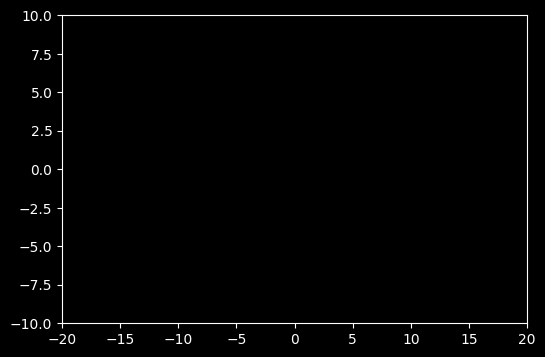

In [13]:
# Define the equations for generalized coordinates
def dub_theta(theta, mon_theta, l2, mon_l2, M, g, k, l):
    val = ((-10 * M * g * np.sin(theta)) - (20 * M * mon_l2 * mon_theta) - (3 * k * (l2 - l) * np.sin(2 * theta))) / (10 * M * l2)
    return val

def dub_l1(theta, l2, M, k, l):
    val = (3 * k * (l2 - l) * np.sin(theta)) / (5 * M)
    return val

def dub_l2(theta, mon_theta, l2, M, g, k, l):
    val = (g * np.cos(theta)) - ((k * (l2 - l)) / M) + (l2 * mon_theta * mon_theta) - (3 * k * (l2 - l) * np.sin(theta) * np.sin(theta)) / (5 * M)
    return val

def runge_kutta_4th_order_step(y, dy, dt):
    k1 = dt * dy
    k2 = dt * (dy + k1 / 2)
    k3 = dt * (dy + k2 / 2)
    k4 = dt * (dy + k3)
    y_new = y + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y_new



while t < 5:
    # Update l1, l2, and theta using Runge-Kutta 4th order method
    l1 = runge_kutta_4th_order_step(l1, mon_l1, dt)
    l2 = runge_kutta_4th_order_step(l2, mon_l2, dt)
    theta = runge_kutta_4th_order_step(theta, mon_theta, dt)
    
    # Update mon_l2 and mon_theta
    kdubl2 = dt * dub_l2(theta, mon_theta, l2, M, g, k, l)
    kdubtheta = dt * dub_theta(theta, mon_theta, l2, mon_l2, M, g, k, l)
    mon_l2 += runge_kutta_4th_order_step(0, kdubl2, dt)
    mon_theta += runge_kutta_4th_order_step(0, kdubtheta, dt)
    
    l1s.append(l1 + l1s[0])
    l2s.append(l2 + l2s[0])
    thetas.append(theta + thetas[0])
    
    t += dt

x = l1s + np.multiply(l2s, np.sin(thetas))
y = np.multiply(l2s, np.cos(thetas))

# Create a plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim([-20, 20])
ax.set_ylim([-10, 10])

def update(i):
    ax.clear()  
    ax.set_xlim([-20, 20])
    ax.set_ylim([-10, 10])
    ax.plot(x[:i], y[:i], "blue")
    ax.plot(x[i-1:i+1], y[i-1:i+1], "red")  

start_time = time.time()
anim = ani.FuncAnimation(fig, func=update, frames=range(100))
anim.save('sistema_pendulo_resorte_cuerporigido.gif', writer='imagemagick', fps=60)

print("Tiempo usado en crear la animación (s):",time.time() - start_time)